In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import pandas as pd 
import numpy as np 

In [75]:
df=pd.read_csv("E:\\UvA 课程\\complex simulation\\Project complex system\\CSS code\\critical_densities_nasch_n=10_L=200_T=100_#p=30_reps=10.csv")

In [78]:
df 

,p_slowdown,v_max,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cd_10,cd_mean,cd_std
0,0.000000,1,0.551724,0.489655,0.510345,0.489655,0.510345,0.510345,0.468966,0.489655,0.510345,0.510345,0.504138,0.020793
1,0.034483,1,0.510345,0.468966,0.468966,0.510345,0.489655,0.510345,0.531034,0.489655,0.510345,0.510345,0.500000,0.019075
2,0.068966,1,0.510345,0.531034,0.468966,0.531034,0.468966,0.510345,0.510345,0.510345,0.489655,0.468966,0.500000,0.023132
3,0.103448,1,0.510345,0.510345,0.531034,0.510345,0.510345,0.489655,0.531034,0.489655,0.489655,0.489655,0.506207,0.015483
4,0.137931,1,0.510345,0.468966,0.551724,0.489655,0.489655,0.510345,0.551724,0.531034,0.489655,0.489655,0.508276,0.026897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.862069,5,0.200000,0.200000,0.200000,0.220690,0.220690,0.200000,0.200000,0.200000,0.200000,0.200000,0.204138,0.008276
146,0.896552,5,0.220690,0.200000,0.200000,0.241379,0.241379,0.200000,0.200000,0.200000,0.200000,0.200000,0.210345,0.016681
147,0.931034,5,0.200000,0.200000,0.220690,0.200000,0.220690,0.200000,0.220690,0.220690,0.200000,0.200000,0.208276,0.010136
148,0.965517,5,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.241379,0.200000,0.204138,0.012414


### pre-process step 

In [77]:
df['critical_density'] = df['critical_density'].str.replace('[', '').str.replace(']', '')
expanded_cols = df['critical_density'].str.split(',', expand=True) #split the data 
expanded_cols = expanded_cols.apply(pd.to_numeric) # change to numerical form 
num_cols = expanded_cols.shape[1]  # 获取拆分后列的数量
column_names = ['cd_{}'.format(i) for i in range(1, num_cols + 1)]
expanded_cols.columns = column_names
df = pd.concat([df, expanded_cols], axis=1) # concat the dataframes 
df.drop('critical_density', axis=1, inplace=True)
df['cd_mean'] = df.filter(like='cd_').mean(axis=1)
df['cd_std'] = df.filter(like='cd_').std(axis=1)


<ipython-input-77-37f25b818b1d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['critical_density'] = df['critical_density'].str.replace('[', '').str.replace(']', '')


### generate the 95% CI based on certain v_max

,p_slowdown,v_max,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cd_10,cd_mean,cd_std
30,0.000000,2,0.344828,0.365517,0.324138,0.344828,0.344828,0.344828,0.365517,0.365517,0.365517,0.365517,0.353103,1.372396e-02
31,0.034483,2,0.344828,0.324138,0.344828,0.365517,0.344828,0.344828,0.324138,0.324138,0.344828,0.344828,0.340690,1.241379e-02
32,0.068966,2,0.344828,0.344828,0.344828,0.344828,0.365517,0.365517,0.344828,0.324138,0.344828,0.303448,0.342759,1.718612e-02
33,0.103448,2,0.344828,0.365517,0.365517,0.365517,0.344828,0.324138,0.365517,0.324138,0.303448,0.344828,0.344828,2.068966e-02
34,0.137931,2,0.344828,0.324138,0.344828,0.344828,0.365517,0.344828,0.324138,0.344828,0.303448,0.324138,0.336552,1.655172e-02
35,0.172414,2,0.303448,0.324138,0.303448,0.324138,0.303448,0.324138,0.344828,0.344828,0.344828,0.365517,0.328276,2.027164e-02
36,0.206897,2,0.303448,0.324138,0.303448,0.365517,0.303448,0.324138,0.365517,0.344828,0.303448,0.303448,0.324138,2.448033e-02
37,0.241379,2,0.303448,0.344828,0.324138,0.324138,0.303448,0.303448,0.344828,0.344828,0.303448,0.303448,0.320000,1.803682e-02
38,0.275862,2,0.324138,0.344828,0.324138,0.324138,0.344828,0.303448,0.324138,0.282759,0.324138,0.303448,0.320000,1.803682e-02
39,0.310345,2,0.324138,0.303448,0.282759,0.303448,0.303448,0.303448,0.324138,0.303448,0.303448,0.344828,0.309655,1.615914e-02


D:\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'p_slowdown')

Text(0, 0.5, 'Critical Density')

Text(0.5, 1.0, '95% Confidence Interval of critical density in V_MAX=2')

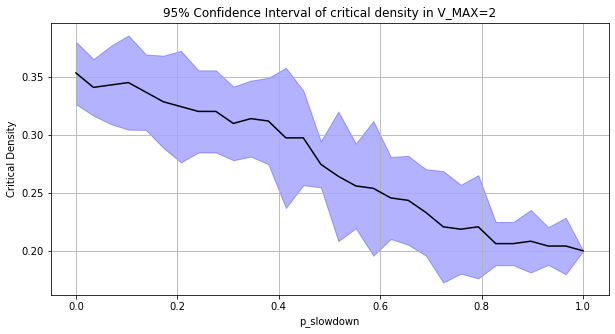

In [88]:
df_speed_2=df[df["v_max"]==2]
df_speed_2 
df_speed_2['lower'] = df_speed_2['cd_mean'] - 1.96 * df_speed_2['cd_std']
df_speed_2['upper'] = df_speed_2['cd_mean'] + 1.96 * df_speed_2['cd_std']

# Plot the data
plt.figure(figsize=(10, 5))
plt.fill_between(df_speed_2['p_slowdown'], df_speed_2['lower'], df_speed_2['upper'], color='blue', alpha=0.3)
plt.plot(df_speed_2['p_slowdown'], df_speed_2['cd_mean'], color='black')
plt.xlabel('p_slowdown')
plt.ylabel('Critical Density')
plt.title('95% Confidence Interval of critical density in V_MAX=2') 
plt.grid(True)
plt.show()

,p_slowdown,v_max,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cd_10,cd_mean,cd_std
0,0.000000,1,0.551724,0.489655,0.510345,0.489655,0.510345,0.510345,0.468966,0.489655,0.510345,0.510345,0.504138,2.079285e-02
1,0.034483,1,0.510345,0.468966,0.468966,0.510345,0.489655,0.510345,0.531034,0.489655,0.510345,0.510345,0.500000,1.907492e-02
2,0.068966,1,0.510345,0.531034,0.468966,0.531034,0.468966,0.510345,0.510345,0.510345,0.489655,0.468966,0.500000,2.313174e-02
3,0.103448,1,0.510345,0.510345,0.531034,0.510345,0.510345,0.489655,0.531034,0.489655,0.489655,0.489655,0.506207,1.548272e-02
4,0.137931,1,0.510345,0.468966,0.551724,0.489655,0.489655,0.510345,0.551724,0.531034,0.489655,0.489655,0.508276,2.689655e-02
5,0.172414,1,0.510345,0.489655,0.468966,0.531034,0.531034,0.510345,0.510345,0.510345,0.489655,0.531034,0.508276,1.951858e-02
6,0.206897,1,0.489655,0.489655,0.510345,0.531034,0.510345,0.510345,0.531034,0.531034,0.531034,0.468966,0.510345,2.068966e-02
7,0.241379,1,0.448276,0.551724,0.489655,0.468966,0.510345,0.468966,0.489655,0.551724,0.531034,0.448276,0.495862,3.706856e-02
8,0.275862,1,0.448276,0.468966,0.489655,0.510345,0.448276,0.531034,0.510345,0.489655,0.510345,0.489655,0.489655,2.617057e-02
9,0.310345,1,0.468966,0.510345,0.489655,0.531034,0.489655,0.510345,0.489655,0.489655,0.489655,0.510345,0.497931,1.655172e-02


D:\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'p_slowdown')

Text(0, 0.5, 'Critical Density')

Text(0.5, 1.0, '95% Confidence Interval of critical density in V_MAX=1')

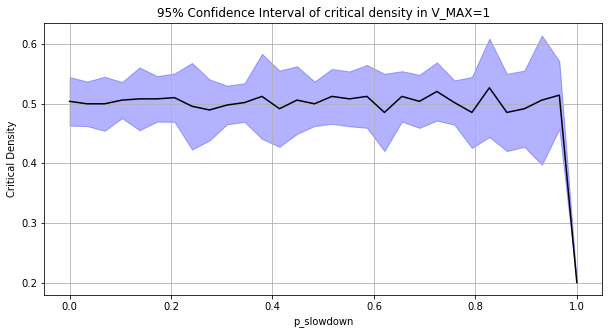

In [89]:
df_speed_1=df[df["v_max"]==1]
df_speed_1 
df_speed_1['lower'] = df_speed_1['cd_mean'] - 1.96 * df_speed_1['cd_std']
df_speed_1['upper'] = df_speed_1['cd_mean'] + 1.96 * df_speed_1['cd_std']

# Plot the data
plt.figure(figsize=(10, 5))
plt.fill_between(df_speed_1['p_slowdown'], df_speed_1['lower'], df_speed_1['upper'], color='blue', alpha=0.3)
plt.plot(df_speed_1['p_slowdown'], df_speed_1['cd_mean'], color='black')
plt.xlabel('p_slowdown')
plt.ylabel('Critical Density')
plt.title('95% Confidence Interval of critical density in V_MAX=1')
plt.grid(True)
plt.show()


,p_slowdown,v_max,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cd_10,cd_mean,cd_std
60,0.000000,3,0.262069,0.303448,0.282759,0.262069,0.282759,0.262069,0.262069,0.303448,0.282759,0.303448,0.280690,1.718612e-02
61,0.034483,3,0.282759,0.303448,0.262069,0.262069,0.262069,0.241379,0.241379,0.282759,0.282759,0.282759,0.270345,1.896238e-02
62,0.068966,3,0.282759,0.241379,0.282759,0.241379,0.262069,0.303448,0.282759,0.262069,0.262069,0.262069,0.268276,1.862069e-02
63,0.103448,3,0.241379,0.282759,0.262069,0.241379,0.262069,0.282759,0.262069,0.262069,0.282759,0.241379,0.262069,1.602614e-02
64,0.137931,3,0.262069,0.262069,0.220690,0.262069,0.262069,0.262069,0.200000,0.262069,0.241379,0.220690,0.245517,2.228344e-02
65,0.172414,3,0.220690,0.262069,0.241379,0.262069,0.262069,0.262069,0.241379,0.262069,0.241379,0.241379,0.249655,1.372396e-02
66,0.206897,3,0.262069,0.262069,0.200000,0.220690,0.241379,0.262069,0.220690,0.262069,0.220690,0.241379,0.239310,2.160063e-02
67,0.241379,3,0.241379,0.220690,0.241379,0.241379,0.241379,0.241379,0.262069,0.262069,0.241379,0.262069,0.245517,1.241379e-02
68,0.275862,3,0.241379,0.220690,0.200000,0.241379,0.241379,0.282759,0.220690,0.220690,0.220690,0.220690,0.231034,2.120059e-02
69,0.310345,3,0.220690,0.220690,0.241379,0.220690,0.241379,0.241379,0.220690,0.241379,0.241379,0.200000,0.228966,1.372396e-02


D:\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'p_slowdown')

Text(0, 0.5, 'Critical Density')

Text(0.5, 1.0, '95% Confidence Interval of critical density in V_MAX=3')

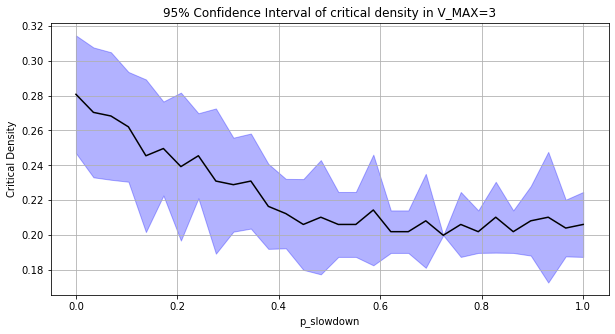

In [90]:

df_speed_3=df[df["v_max"]==3]
df_speed_3 
df_speed_3['lower'] = df_speed_3['cd_mean'] - 1.96 * df_speed_3['cd_std']
df_speed_3['upper'] = df_speed_3['cd_mean'] + 1.96 * df_speed_3['cd_std']

# Plot the data
plt.figure(figsize=(10, 5))
plt.fill_between(df_speed_3['p_slowdown'], df_speed_3['lower'], df_speed_3['upper'], color='blue', alpha=0.3)
plt.plot(df_speed_3['p_slowdown'], df_speed_3['cd_mean'], color='black')
plt.xlabel('p_slowdown')
plt.ylabel('Critical Density')
plt.title('95% Confidence Interval of critical density in V_MAX=3')
plt.grid(True)
plt.show()


,p_slowdown,v_max,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cd_10,cd_mean,cd_std
90,0.000000,4,0.241379,0.241379,0.200000,0.241379,0.220690,0.220690,0.220690,0.20000,0.220690,0.241379,0.224828,1.548272e-02
91,0.034483,4,0.220690,0.220690,0.262069,0.241379,0.220690,0.200000,0.241379,0.22069,0.200000,0.200000,0.222759,1.951858e-02
92,0.068966,4,0.220690,0.241379,0.200000,0.241379,0.262069,0.200000,0.200000,0.22069,0.200000,0.200000,0.218621,2.160063e-02
93,0.103448,4,0.200000,0.220690,0.220690,0.220690,0.200000,0.200000,0.200000,0.22069,0.200000,0.200000,0.208276,1.013582e-02
94,0.137931,4,0.241379,0.200000,0.220690,0.200000,0.220690,0.241379,0.200000,0.20000,0.220690,0.241379,0.218621,1.718612e-02
95,0.172414,4,0.200000,0.220690,0.241379,0.200000,0.200000,0.200000,0.200000,0.22069,0.200000,0.200000,0.208276,1.372396e-02
96,0.206897,4,0.200000,0.220690,0.220690,0.200000,0.200000,0.200000,0.200000,0.22069,0.200000,0.200000,0.206207,9.481191e-03
97,0.241379,4,0.200000,0.200000,0.200000,0.200000,0.220690,0.200000,0.200000,0.22069,0.200000,0.200000,0.204138,8.275862e-03
98,0.275862,4,0.200000,0.220690,0.220690,0.220690,0.200000,0.220690,0.200000,0.22069,0.200000,0.200000,0.210345,1.034483e-02
99,0.310345,4,0.200000,0.200000,0.200000,0.200000,0.220690,0.220690,0.200000,0.22069,0.200000,0.200000,0.206207,9.481191e-03


D:\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'p_slowdown')

Text(0, 0.5, 'Critical Density')

Text(0.5, 1.0, '95% Confidence Interval of critical density in V_MAX=4')

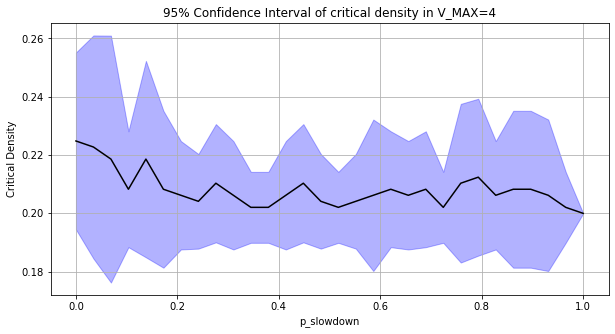

In [91]:
df_speed_4=df[df["v_max"]==4]
df_speed_4 
df_speed_4['lower'] = df_speed_4['cd_mean'] - 1.96 * df_speed_4['cd_std']
df_speed_4['upper'] = df_speed_4['cd_mean'] + 1.96 * df_speed_4['cd_std']

# Plot the data
plt.figure(figsize=(10, 5))
plt.fill_between(df_speed_4['p_slowdown'], df_speed_4['lower'], df_speed_4['upper'], color='blue', alpha=0.3)
plt.plot(df_speed_4['p_slowdown'], df_speed_4['cd_mean'], color='black')
plt.xlabel('p_slowdown')
plt.ylabel('Critical Density')
plt.title('95% Confidence Interval of critical density in V_MAX=4')
plt.grid(True)
plt.show()

,p_slowdown,v_max,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cd_10,cd_mean,cd_std
120,0.000000,5,0.20000,0.20000,0.200000,0.220690,0.200000,0.22069,0.220690,0.200000,0.220690,0.200000,0.208276,1.013582e-02
121,0.034483,5,0.20000,0.20000,0.220690,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.202069,6.206897e-03
122,0.068966,5,0.20000,0.20000,0.200000,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,2.775558e-17
123,0.103448,5,0.20000,0.20000,0.200000,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,2.775558e-17
124,0.137931,5,0.20000,0.20000,0.200000,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.220690,0.202069,6.206897e-03
125,0.172414,5,0.20000,0.20000,0.220690,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.202069,6.206897e-03
126,0.206897,5,0.22069,0.20000,0.220690,0.220690,0.220690,0.20000,0.200000,0.200000,0.200000,0.241379,0.212414,1.372396e-02
127,0.241379,5,0.20000,0.20000,0.200000,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.241379,0.204138,1.241379e-02
128,0.275862,5,0.20000,0.22069,0.200000,0.200000,0.200000,0.20000,0.200000,0.220690,0.200000,0.200000,0.204138,8.275862e-03
129,0.310345,5,0.20000,0.20000,0.220690,0.200000,0.200000,0.20000,0.200000,0.220690,0.200000,0.220690,0.206207,9.481191e-03


D:\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'p_slowdown')

Text(0, 0.5, 'Critical Density')

Text(0.5, 1.0, '95% Confidence Interval of critical density in V_MAX=5')

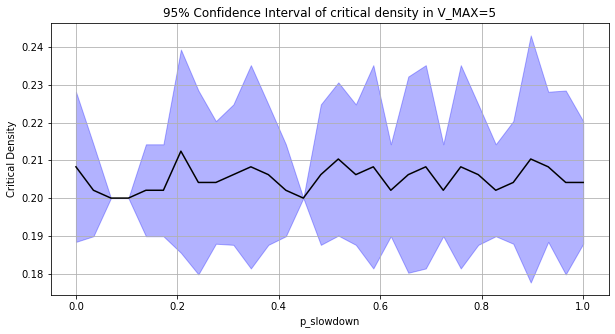

In [92]:
df_speed_5=df[df["v_max"]==5]
df_speed_5 
df_speed_5['lower'] = df_speed_5['cd_mean'] - 1.96 * df_speed_5['cd_std']
df_speed_5['upper'] = df_speed_5['cd_mean'] + 1.96 * df_speed_5['cd_std']

# Plot the data
plt.figure(figsize=(10, 5))
plt.fill_between(df_speed_5['p_slowdown'], df_speed_5['lower'], df_speed_5['upper'], color='blue', alpha=0.3)
plt.plot(df_speed_5['p_slowdown'], df_speed_5['cd_mean'], color='black')
plt.xlabel('p_slowdown')
plt.ylabel('Critical Density')
plt.title('95% Confidence Interval of critical density in V_MAX=5')
plt.grid(True)
plt.show()

<ipython-input-41-aed5e89ba665>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['cd_mean'] = expanded_cols.mean(axis=1)
<ipython-input-41-aed5e89ba665>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['cd_variance'] = expanded_cols.var(axis=1)
